In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('DataForNLP.csv')

In [4]:
df.head()

,Q3,Q4,Q5,Q6,Q7,Q8,Q37
0,4.0,2,"1,6,7",1,8,3,"Keep the videos short, keep extra example outs..."
1,4.0,4,6,1,7,3,It was very time consuming.\nI believe it is t...
2,3.0,4,3,3,8,3,Horrible experience. I am seriously considerin...
3,3.0,4,6,1,7,3,1 needed new equipment paid for by me\nhad to...
4,3.0,4,5,1,4,3,I was familiar with Zoom from video conferenci...


In [4]:
response=df['Q37'].tolist()

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/colingreen1/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
df['scores']=df['Q37'].apply(lambda Q37: sentiment.polarity_scores(Q37))

In [7]:
df.head()

,Q3,Q4,Q5,Q6,Q7,Q8,Q37,scores
0,4.0,2,"1,6,7",1,8,3,"Keep the videos short, keep extra example outs...","{'neg': 0.077, 'neu': 0.856, 'pos': 0.066, 'co..."
1,4.0,4,6,1,7,3,It was very time consuming.\nI believe it is t...,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp..."
2,3.0,4,3,3,8,3,Horrible experience. I am seriously considerin...,"{'neg': 0.51, 'neu': 0.49, 'pos': 0.0, 'compou..."
3,3.0,4,6,1,7,3,1 needed new equipment paid for by me\nhad to...,"{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'comp..."
4,3.0,4,5,1,4,3,I was familiar with Zoom from video conferenci...,"{'neg': 0.065, 'neu': 0.848, 'pos': 0.087, 'co..."


In [8]:
sentiment.polarity_scores(response[1])

{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.4404}

In [8]:
df['compound']=df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Q3,Q4,Q5,Q6,Q7,Q8,Q37,scores,compound
0,4.0,2,"1,6,7",1,8,3,"Keep the videos short, keep extra example outs...","{'neg': 0.077, 'neu': 0.856, 'pos': 0.066, 'co...",0.0660
1,4.0,4,6,1,7,3,It was very time consuming.\nI believe it is t...,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.4404
2,3.0,4,3,3,8,3,Horrible experience. I am seriously considerin...,"{'neg': 0.51, 'neu': 0.49, 'pos': 0.0, 'compou...",-0.6369
3,3.0,4,6,1,7,3,1 needed new equipment paid for by me\nhad to...,"{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'comp...",-0.4404
4,3.0,4,5,1,4,3,I was familiar with Zoom from video conferenci...,"{'neg': 0.065, 'neu': 0.848, 'pos': 0.087, 'co...",0.4364


In [9]:
compound_scores=df['compound'].tolist()
print(compound_scores)

[0.066, 0.4404, -0.6369, -0.4404, 0.4364, -0.4019, -0.8214, 0.4019, 0.9008, -0.4926, 0.2023, -0.849, -0.8042, 0.34, -0.4019, 0.3382, 0.8419, 0.3108, -0.9051, 0.4033, 0.6715, 0.7203, -0.2484, -0.128, -0.7017, 0.3182, -0.6256, -0.1546, 0.9153, -0.3097, 0.4951, 0.5984, 0.8104, 0.4404, 0.5106, 0.9149, 0.8854, 0.2263, -0.4323, 0.7906, 0.1263, -0.4398, 0.7861, 0.8705, 0.4404, -0.9455, 0.4703, 0.9193, 0.9413, 0.7328, 0.1664, -0.101, 0.0, 0.0, -0.7305, -0.2533, 0.4536, 0.8225, 0.9964, 0.0, -0.653, -0.97, -0.4019, -0.5804, 0.0, -0.2975, 0.0, -0.2023, 0.8481, -0.7777, 0.9359, 0.0, 0.6166, 0.8016, 0.3291, -0.967, 0.223, 0.936, 0.5256, 0.0204, 0.7745, -0.1591, 0.606, 0.5994, 0.93, -0.9412, 0.9287, 0.7089, 0.768, 0.0, 0.5423, 0.9217, 0.7501, 0.2734, 0.6705, -0.3535, 0.7537, 0.936, 0.7553, 0.4767, -0.7269, -0.0992, 0.8218, 0.4926, 0.8656, -0.4812, 0.0, 0.8917, 0.6526, -0.8764, 0.3832, -0.5256, -0.2966, -0.3284, 0.905, 0.8122, -0.8106, 0.875, 0.4391, 0.1655, 0.9675, -0.1511, 0.8519, -0.5106, 0.8287, 

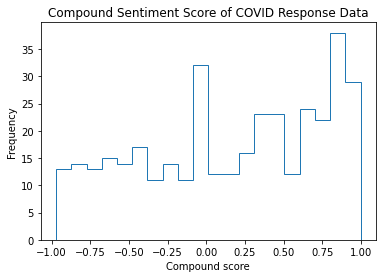

In [21]:
plt.hist(compound_scores, bins=20, histtype='step')
plt.xlabel('Compound score')
plt.ylabel('Frequency')
plt.title('Compound Sentiment Score of COVID Response Data')
plt.savefig('compound_sentiment_hist.pdf')
plt.show()

In [22]:
compound_sc=np.array(compound_scores)

In [23]:
print(compound_sc)

[ 0.066   0.4404 -0.6369 -0.4404  0.4364 -0.4019 -0.8214  0.4019  0.9008
 -0.4926  0.2023 -0.849  -0.8042  0.34   -0.4019  0.3382  0.8419  0.3108
 -0.9051  0.4033  0.6715  0.7203 -0.2484 -0.128  -0.7017  0.3182 -0.6256
 -0.1546  0.9153 -0.3097  0.4951  0.5984  0.8104  0.4404  0.5106  0.9149
  0.8854  0.2263 -0.4323  0.7906  0.1263 -0.4398  0.7861  0.8705  0.4404
 -0.9455  0.4703  0.9193  0.9413  0.7328  0.1664 -0.101   0.      0.
 -0.7305 -0.2533  0.4536  0.8225  0.9964  0.     -0.653  -0.97   -0.4019
 -0.5804  0.     -0.2975  0.     -0.2023  0.8481 -0.7777  0.9359  0.
  0.6166  0.8016  0.3291 -0.967   0.223   0.936   0.5256  0.0204  0.7745
 -0.1591  0.606   0.5994  0.93   -0.9412  0.9287  0.7089  0.768   0.
  0.5423  0.9217  0.7501  0.2734  0.6705 -0.3535  0.7537  0.936   0.7553
  0.4767 -0.7269 -0.0992  0.8218  0.4926  0.8656 -0.4812  0.      0.8917
  0.6526 -0.8764  0.3832 -0.5256 -0.2966 -0.3284  0.905   0.8122 -0.8106
  0.875   0.4391  0.1655  0.9675 -0.1511  0.8519 -0.5106  0.828

In [24]:
mu=np.mean(compound_sc)
std=np.std(compound_sc)
minimum=np.min(compound_sc)
maximum=np.max(compound_sc)
print(mu,std,minimum,maximum)

0.16103780821917807 0.577804506917672 -0.97 0.9964


In [25]:
import scipy.stats as st

In [26]:
st.t.interval(alpha=0.95, df=len(compound_scores)-1, loc=np.mean(compound_scores), scale=st.sem(compound_scores))

(0.1014819138063247, 0.22059370263203143)